[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_mmdet.ipynb)

## 0. Preperation

- Install latest version of SAHI and MMDetection:

In [ ]:
!pip install -U sahi
!pip install -U mmdet mmcv-full

In [1]:
import os
os.getcwd()

- Import required modules:

In [1]:
# arrange an instance segmentation model for test
from sahi.utils.mmdet import (
    download_mmdet_cascade_mask_rcnn_model,
    download_mmdet_config,
)

# import required functions, classes
from sahi.model import MmdetDetectionModel
from sahi.utils.cv import read_image, visualize_object_predictions
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a cascade mask rcnn model and two test images:

In [ ]:
# download cascade mask rcnn model&config
model_path = 'models/cascade_mask_rcnn.pth'
download_mmdet_cascade_mask_rcnn_model(model_path)
config_path = download_mmdet_config(model_name="cascade_rcnn", config_file_name="cascade_mask_rcnn_r50_fpn_1x_coco.py",)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a MMDetection Model

- Instantiate a detection model by defining model weight path, confing path and other parameters:

In [ ]:
detection_model = MmdetDetectionModel(
    model_path=model_path,
    config_path=config_path,
    prediction_score_threshold=0.4,
    device="cpu", # or 'cuda'
)

- Load an image as a numpy array:

In [4]:
image_path = "demo_data/small-vehicles1.jpeg"
image = read_image(image_path)

- Perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(image, detection_model)

- Visualize predicted bounding boxes and masks over the original image:

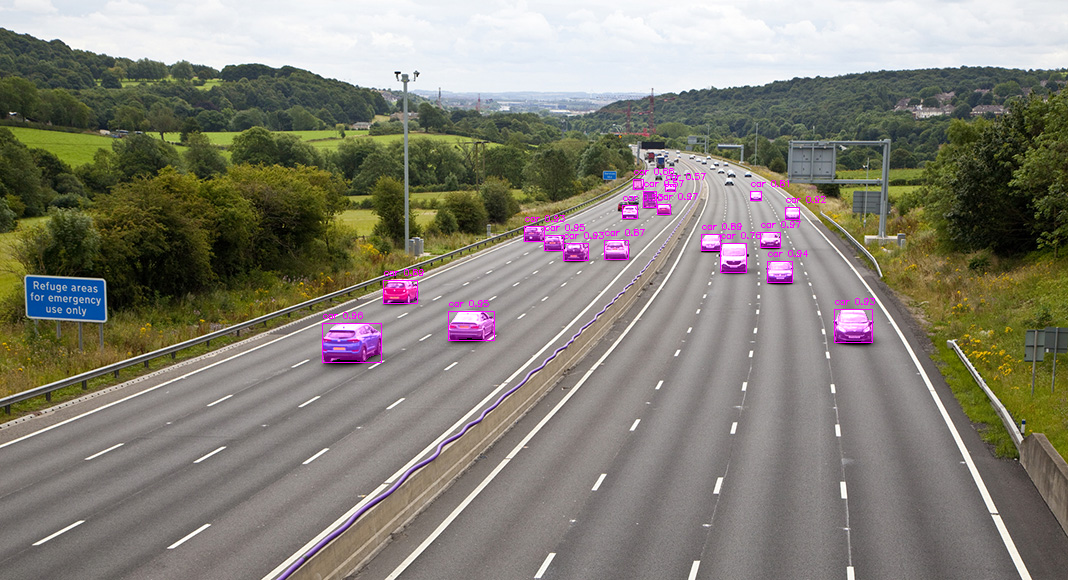

In [10]:
visualization_result = visualize_object_predictions(
    image,
    object_prediction_list=result["object_prediction_list"],
    output_dir="demo_data/",
    file_name="prediction",
)
Image("demo_data/prediction.png")

## 2. Sliced Inference with a MMDetection Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [8]:
result = get_sliced_prediction(
    image,
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Number of slices: 18


- Visualize predicted bounding boxes and masks over the original image:

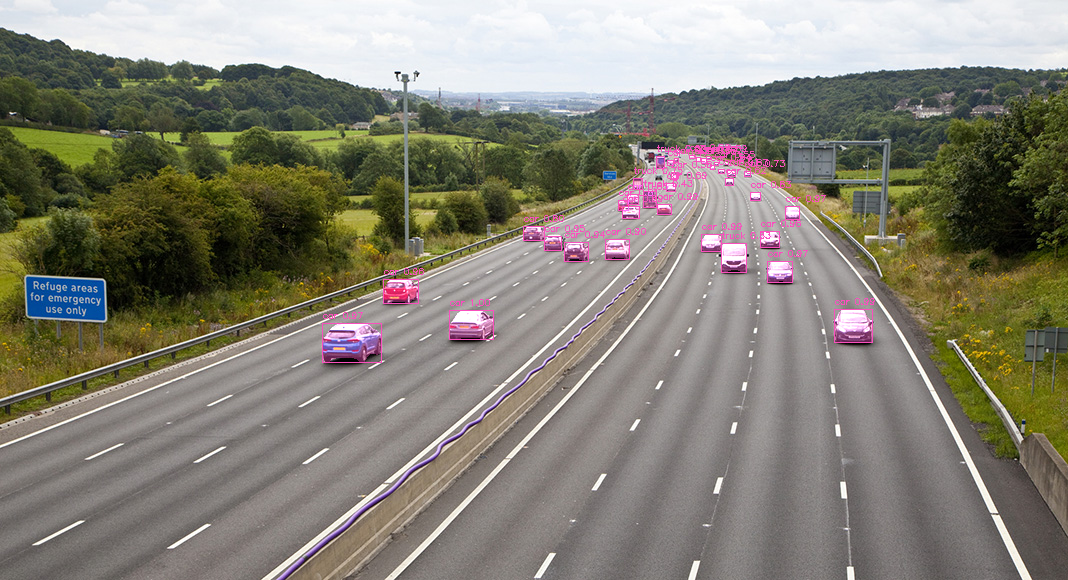

In [10]:
visualization_result = visualize_object_predictions(
    image,
    object_prediction_list=result["object_prediction_list"],
    output_dir="demo_data/",
    file_name="sliced_prediction",
)
Image("demo_data/sliced_prediction.png")

## 3. Prediction Result

- Predictions are returned as a list of [sahi.prediction.ObjectPrediction](sahi/prediction.py):

In [12]:
object_prediction_list = result["object_prediction_list"]

In [13]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(657, 204, 670, 214), w: 13, h: 10>,
    mask: <sahi.annotation.Mask object at 0x7f96ca330220>,
    score: PredictionScore: <score: 0.9727990627288818>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [14]:
object_prediction_list[0].to_coco_annotation()

CocoAnnotation<
    image_id: None,
    bbox: [657, 204, 13, 10],
    segmentation: [[662, 204, 661, 205, 659, 205, 657, 207, 657, 214, 669, 214, 670, 213, 670, 207, 668, 205, 667, 205, 666, 204]],
    category_id: 2,
    category_name: car,
    iscrowd: 0,
    area: 117>

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [15]:
object_prediction_list[0].to_coco_prediction().json

{'image_id': None,
 'bbox': [657, 204, 13, 10],
 'score': 0.9727990627288818,
 'category_id': 2,
 'category_name': 'car',
 'segmentation': [[662,
   204,
   661,
   205,
   659,
   205,
   657,
   207,
   657,
   214,
   669,
   214,
   670,
   213,
   670,
   207,
   668,
   205,
   667,
   205,
   666,
   204]],
 'iscrowd': 0,
 'area': 117}

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [16]:
object_prediction_list[0].to_imantics_annotation()

## 4. Batch Prediction

- Set model and directory parameters:

In [16]:
model_name = "MmdetDetectionModel"
model_parameters = {
    "model_path": model_path,
    "config_path": config_path,
    "device": "cpu", # or 'cuda'
    "prediction_score_threshold":0.4,
    "category_mapping": None,
    "category_remapping": None,
}
apply_sliced_prediction = True
slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [17]:
predict(
    model_name=model_name,
    model_parameters=model_parameters,
    source=source_image_dir,
    apply_sliced_prediction=apply_sliced_prediction,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 2 listed files in folder .
Use load_from_local loader


  0%|          | 0/2 [00:00<?, ?it/s]

Number of slices: 20


 50%|█████     | 1/2 [00:02<00:02,  2.33s/it]

Number of slices: 18


100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

Model loaded in 0.9775676727294922 seconds.
Slicing performed in 0.00495457649230957 seconds.
Prediction performed in 4.52738094329834 seconds.
Exporting performed in 0.11608457565307617 seconds.
